Size of training set: 2076
Size of validation set: 259
Size of test set: 259
Dice coefficient for images left to right
Dice Coefficient image 1 :0.3022004507732194
Dice Coefficient image 2 :0.057424931078161094
Dice Coefficient image 3 :0.6161304236227432
Dice Coefficient image 4 :0.4241622309162261


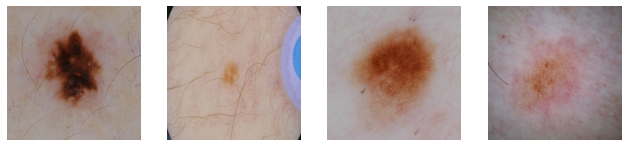

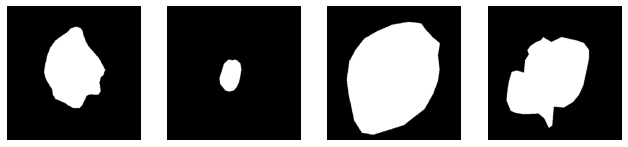

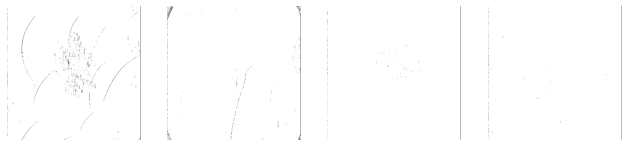

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import helper

#Getting the filenames for the masks and images, sorting them so corresponding mask match corresponding image
masks = sorted(glob.glob("D:/ISIC2018_Task1_Training_GroundTruth_x2/*.png"))
files = sorted(glob.glob("D:/ISIC2018_Task1-2_Training_Input_x2/*.jpg"))

#We split the data such that train data is 80%, validation and test data are 20%
train_images, train_masks, val_masks, val_images, test_masks, test_images = helper.split_data(files, masks, 0.2, 0.5)

print('Size of training set:', len(train_images))
print('Size of validation set:', len(val_images))
print('Size of test set:', len(test_images))

#We map the filenames and masks to data arrays and shuffle them
train_data = helper.shuffle_map_data(train_images, train_masks)
val_data = helper.shuffle_map_data(val_images, val_masks)
test_data = helper.shuffle_map_data(test_images, test_masks)
        
model = helper.unet()
model.compile(optimizer='adam',
             loss ='categorical_crossentropy',
             metrics=[helper.dice_coef, 'accuracy'])
#Predictions before training our model on the validation data
#The dice coefficients is printed in order for each image
helper.predictions(val_data, model)
    

In [2]:
history = model.fit(train_data.batch(32), epochs = 6, validation_data = val_data.batch(32))

Train for 65 steps, validate for 9 steps
Epoch 1/6
65/65 [==============================] - 120s 2s/step - loss: 0.5389 - dice_coef: 0.6231 - accuracy: 0.7553 - val_loss: 0.4502 - val_dice_coef: 0.7188 - val_accuracy: 0.7475
Epoch 2/6
65/65 [==============================] - 87s 1s/step - loss: 0.4029 - dice_coef: 0.7321 - accuracy: 0.8077 - val_loss: 0.3928 - val_dice_coef: 0.7148 - val_accuracy: 0.7479
Epoch 3/6
65/65 [==============================] - 137s 2s/step - loss: 0.3638 - dice_coef: 0.7583 - accuracy: 0.8077 - val_loss: 0.3363 - val_dice_coef: 0.7822 - val_accuracy: 0.7479
Epoch 4/6
65/65 [==============================] - 68s 1s/step - loss: 0.3611 - dice_coef: 0.7643 - accuracy: 0.8077 - val_loss: 0.3308 - val_dice_coef: 0.7581 - val_accuracy: 0.7479
Epoch 5/6
65/65 [==============================] - 128s 2s/step - loss: 0.3421 - dice_coef: 0.7753 - accuracy: 0.8395 - val_loss: 0.3456 - val_dice_coef: 0.7562 - val_accuracy: 0.8724
Epoch 6/6
65/65 [========================

Dice coefficient for images left to right
Dice Coefficient image 1 :0.1473380551548944
Dice Coefficient image 2 :0.9651427727894125
Dice Coefficient image 3 :0.8274132975263832
Dice Coefficient image 4 :0.732081946398545
Dice Coefficient image 5 :0.7173747817056261
Dice Coefficient image 6 :0.9800531523090612
Dice Coefficient image 7 :0.8014727575260506
Dice Coefficient image 8 :0.8584086478823321
Dice Coefficient image 9 :0.9776922987440527
Dice Coefficient image 10 :0.822964615514953


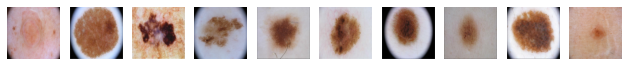

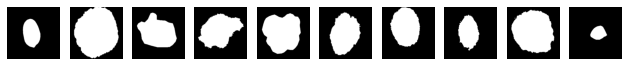

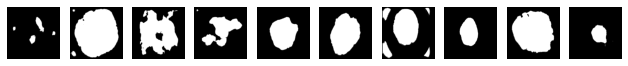

In [3]:
#Predictions on the test data
helper.predictions(test_data, model, 10)

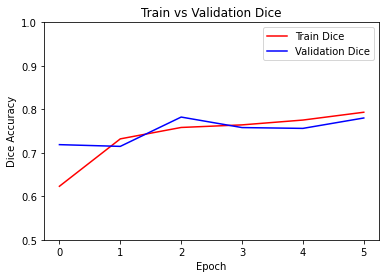

In [4]:
train_coef = history.history['dice_coef']
val_coef = history.history['val_dice_coef']


epochs = range(6)

plt.figure()
plt.plot(epochs, train_coef, 'r', label='Train Dice')
plt.plot(epochs, val_coef, 'b', label='Validation Dice')
plt.title('Train vs Validation Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [5]:
#Testing our model against Test set
results = model.evaluate(test_data.batch(32))

9/9 [==============================] - 2s 211ms/step - loss: 0.3530 - dice_coef: 0.7590 - accuracy: 0.8926


In [7]:
#We find the average dice coefficient for all the images in test data set using
#our model prediction
helper.average_dice(test_data, model)

0.804764514561205
